In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

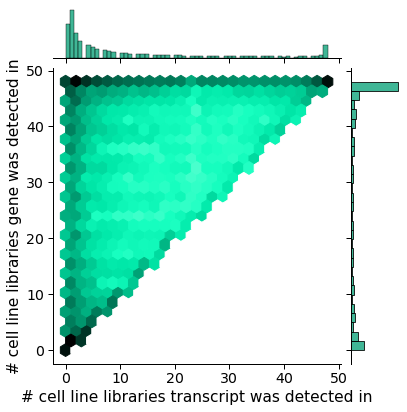

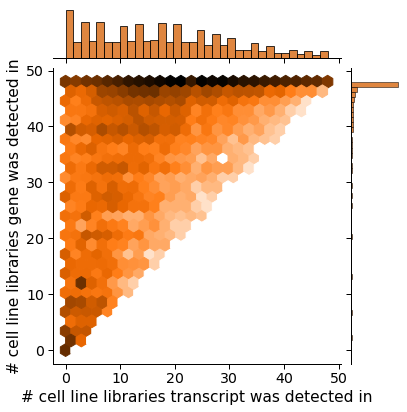

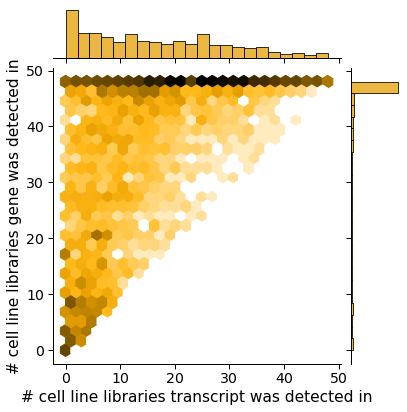

In [4]:
plot_gene_v_iso_sample_det(df,
                           sample='cell_line', 
                           opref='figures/')

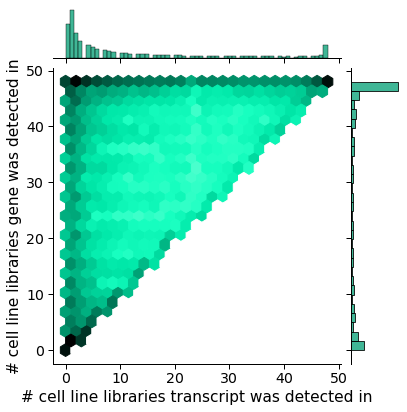

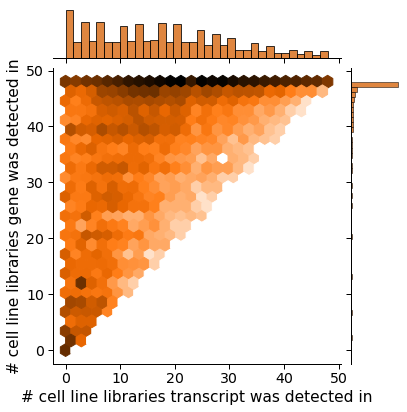

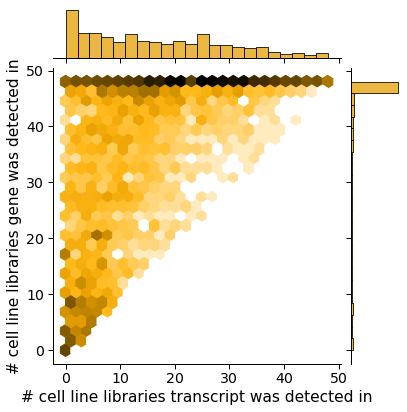

In [44]:
df = rm_sirv_ercc(df)
dataset_cols = get_sample_datasets(sample)

t_df = df[dataset_cols+['annot_transcript_id']].copy(deep=True)
t_df.set_index('annot_transcript_id', inplace=True)
t_df = t_df.astype(bool)
t_df['n_samples_transcript'] = t_df.sum(1)
t_df = t_df['n_samples_transcript'].to_frame()
t_df.reset_index(inplace=True)

g_df = df.loc[df.gene_novelty == 'Known'].copy(deep=True)
g_df = g_df[dataset_cols+['annot_gene_id']]
g_df = g_df.groupby('annot_gene_id').sum()
g_df = g_df.astype(bool)
g_df['n_samples_gene'] = g_df.sum(1)
g_df = g_df['n_samples_gene'].to_frame()
g_df.reset_index(inplace=True)

cols = ['annot_gene_id', 'annot_transcript_id', 'transcript_novelty']
t_df = t_df.merge(df[cols], how='left', on='annot_transcript_id')
t_df = t_df.merge(g_df, how='left', on='annot_gene_id')

# c_dict, order = get_talon_nov_colors(['Known', 'NIC', 'NNC'])
c_dict, order = get_talon_nov_colors()
sns.set_context('paper', font_scale=1.6)

for nov in ['Known', 'NIC', 'NNC']:
    temp = t_df.loc[t_df.transcript_novelty == nov].copy(deep=True)
    ax = sns.jointplot(data=temp, x='n_samples_transcript', 
                     y='n_samples_gene',
                     kind='hex',
                     color=c_dict[nov],
                     bins='log',
                     gridsize=25)
#                      hue='transcript_novelty', palette=c_dict)
    #                  xlim=(0,xlim), ylim=(0,ylim), 
    #                  joint_kws={'data':df, 's':2, 'alpha':0.5})
    ax = ax.ax_joint

#     ax.legend(title='')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     ax.get_legend().remove()

    if sample == 'tissue':
        ylabel = '# tissue libraries gene was detected in'
        xlabel = '# tissue libraries transcript was detected in'
    elif sample == 'cell_line':
        ylabel = '# cell line libraries gene was detected in'
        xlabel = '# cell line libraries transcript was detected in'

    _ = ax.set(xlabel=xlabel, ylabel=ylabel)

    fname = '{}{}_gene_v_{}_iso_n_samp_det.png'.format(opref, sample, nov)
    plt.savefig(fname, dpi=300, bbox_inches='tight')

# t_df.loc[t_df.n_samples_transcript != t_df.n_samples_gene]
# t_df.loc[t_df.annot_gene_id == 'ENSG00000279457.4']

In [ ]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')
filt_df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

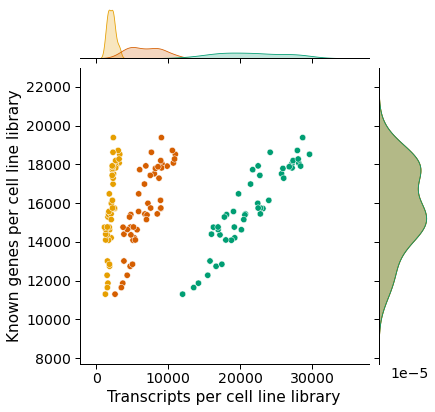

In [3]:
plot_gene_v_iso_det(df, filt_df,
                   sample='cell_line',
                   opref='figures/')

In [ ]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')

Found 21 distinct cell lines


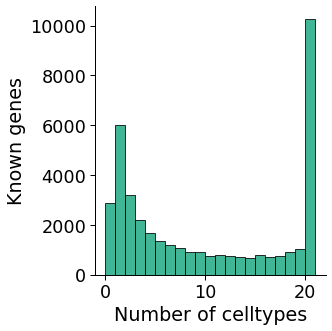

In [3]:
plot_biosamp_det(df, how='gene',
                 sample='cell_line',
                 groupby='cell_line',
                 opref='figures/')

Found 48 distinct libraries


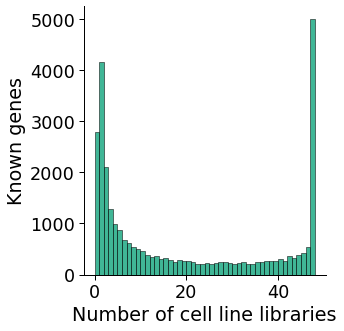

In [10]:
plot_biosamp_det(df, how='gene',
                 sample='cell_line',
                 groupby='library',
                 nov='Known',
                 opref='figures/')

Found 21 distinct cell lines


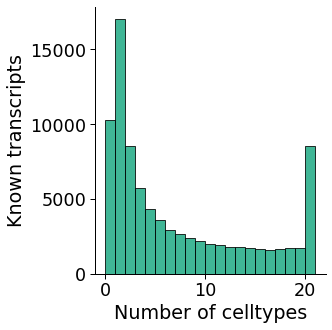

In [11]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 opref='figures/')

Found 48 distinct libraries


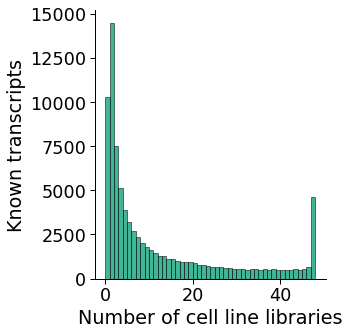

In [12]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 opref='figures/')

In [5]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

Found 21 distinct cell lines


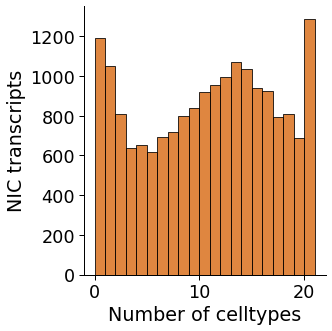

In [6]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 nov='NIC',
                 opref='figures/')

Found 48 distinct libraries


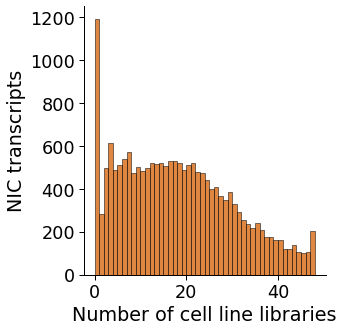

In [7]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 nov='NIC',
                 opref='figures/')

Found 21 distinct cell lines


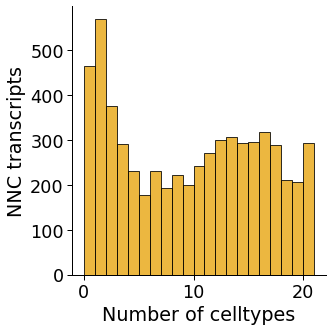

In [8]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 nov='NNC',
                 opref='figures/')

Found 48 distinct libraries


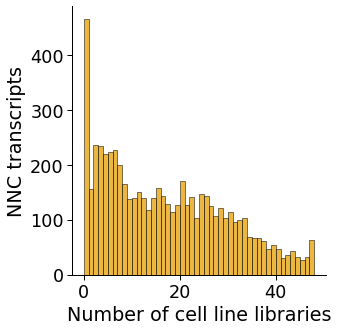

In [9]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 nov='NNC',
                 opref='figures/')